In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
cl_df= pd.read_csv('cleaned_data.csv')

In [138]:
cl_df.head(2)

,Unnamed: 0,order_id,order_date,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,...,customer_segment,product_category,product_sub-category,product_name,product_container,product_base_margin,ship_date,birthdate,Manager,Status
0,0,3,2010-10-13,Low,06/01/1900,261.54,0.04,Regular Air,-213.25,38.94,...,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,1970-08-04,Chris,Not Returned
1,1,293,2012-10-01,High,18/02/1900,10123.02,0.07,Delivery Truck,457.81,208.16,...,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-02-10,1969-05-14,Chris,Not Returned


# Ploting With matplot

In [6]:
# Line plot --> Trends
# bar chart or column --> comparison
# Histogram --> Distribution
# pie chart ---> portion # for more 3data points
# scatter plot  --> relationship between two numeric variables


<AxesSubplot:ylabel='Frequency'>

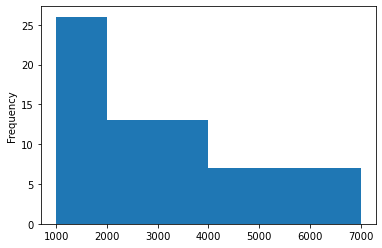

In [17]:
cl_df['unit_price'].plot.hist(bins= [1000,2000,3000,4000,7000])

In [ ]:
# cl_df['unit_price'].plot.pie()

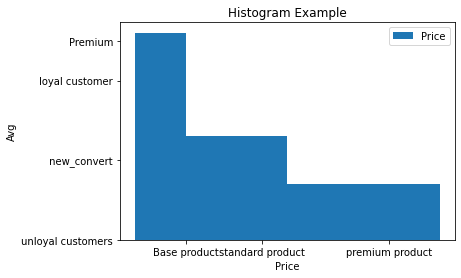

In [42]:
# option1 
_= plt.hist(x= cl_df['unit_price'],bins= [1000,2000,3000,4000,7000], label= 'Price')
_= plt.ylabel('Avg')
_= plt.xlabel('Price')
_= plt.title('Histogram Example')
_= plt.legend()
_= plt.yticks([0,10,20,25],['unloyal customers',' new_convert', 'loyal customer', 'Premium'])
_= plt.xticks([2000,3500,6000],['Base product','standard product', 'premium product'])

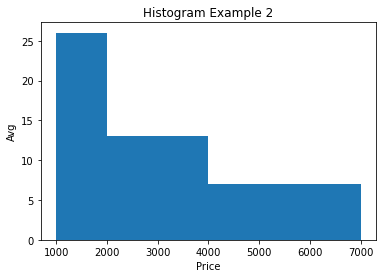

In [71]:
#option 2
fig, ax= plt.subplots()
_= ax.hist(x= cl_df['unit_price'],bins= [1000,2000,3000,4000,7000], label= 'Price')
_= ax.set_ylabel('Avg')
_= ax.set_xlabel('Price')
_= ax.set_title('Histogram Example 2')


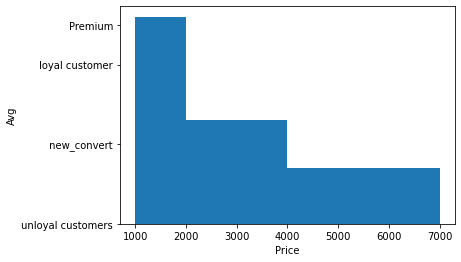

In [74]:
# setting shirtcut for attributes
fig, ax= plt.subplots()
_= ax.hist(x= np.sort(cl_df['unit_price']),bins= [1000,2000,3000,4000,7000], label= 'Price')
_= ax.set(
    ylabel= 'Avg',
    xlabel = 'Price',
    yticks= [0,10,20,25],
    yticklabels= ['unloyal customers',' new_convert', 'loyal customer', 'Premium']
)

## Line plots

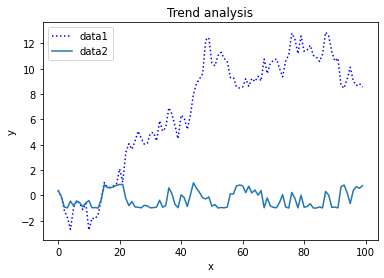

In [95]:
data = np.random.randn(100).cumsum()
data2= np.sin(data)
fig, ax = plt.subplots()
_= ax.plot(data, linestyle ='dotted', color= 'blue', label= 'data1') #shift +tab
_= ax.plot(data2, label='data2')
_= ax.set(
    ylabel= 'y',
    xlabel = 'x',
    title = 'Trend analysis'
)
_= ax.legend(loc= 'upper left')

## Bar chart

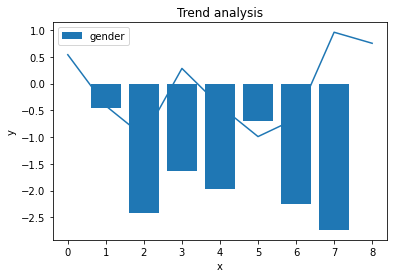

In [112]:
data = np.array([1,2,3,5,2,3,4,6,7])
h= np.random.randn(9).cumsum()
fig, ax = plt.subplots()

_= ax.bar(data,h, label= 'gender')
_= ax.plot(np.cos(data))
_= ax.set(
    ylabel= 'y',
    xlabel = 'x',
    title = 'Trend analysis'
)
_= ax.legend(loc= 'upper left')

In [114]:
cl_df.corr()

,Unnamed: 0,order_id,sales,discount,profit,unit_price,shipping_cost,product_base_margin
Unnamed: 0,1.000000,0.042530,0.007680,-0.002117,-0.000896,0.031096,-0.018655,-0.010574
order_id,0.042530,1.000000,-0.007681,-0.003609,-0.007014,-0.004433,-0.004246,-0.017844
sales,0.007680,-0.007681,1.000000,-0.019552,0.581884,0.602439,0.434495,0.129632
discount,-0.002117,-0.003609,-0.019552,1.000000,-0.037156,0.001371,-0.001535,-0.002694
profit,-0.000896,-0.007014,0.581884,-0.037156,1.000000,-0.009112,-0.021393,-0.114720
unit_price,0.031096,-0.004433,0.602439,0.001371,-0.009112,1.000000,0.239788,0.047479
shipping_cost,-0.018655,-0.004246,0.434495,-0.001535,-0.021393,0.239788,1.000000,0.328304
product_base_margin,-0.010574,-0.017844,0.129632,-0.002694,-0.114720,0.047479,0.328304,1.000000


In [139]:
def convert_cat(x):
    if x == 'Office Supplies':
        return 0
    elif x == 'Technology':
        return 1
    else:
        return 2
    
    
# cl_df['product_category']= cl_df['product_category'].astype(str)   
#  ['Office Supplies', 'Technology', 'Furniture'   
cl_df['product_category']= cl_df['product_category'].apply(convert_cat)
cl_df['product_category'].unique()

array([0, 1, 2])

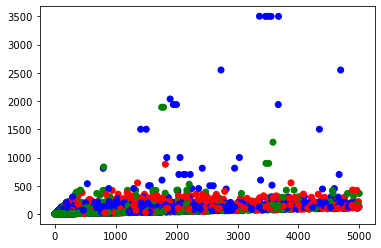

In [159]:
from matplotlib.colors import ListedColormap

# sales= cl_df[cl_df['sales']<4000]
# profit= cl_df['profit']
# unit_price= cl_df['unit_price']
sales= cl_df[cl_df['sales']<5000]['sales'] 
profit= cl_df[cl_df['sales']<5000]['profit']
unit_price = cl_df[cl_df['sales']<5000]['unit_price']
cmap = ListedColormap(['green','blue','red'])

fig, ax = plt.subplots()
ax.scatter(x= sales,y=unit_price,c=cl_df[cl_df['sales']<5000]['product_category'], cmap=cmap)

In [122]:
cl_df[cl_df['sales']> 60000]

,Unnamed: 0,order_id,order_date,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,...,customer_segment,product_category,product_sub-category,product_name,product_container,product_base_margin,ship_date,birthdate,Manager,Status
4659,4659,29766,2009-03-21,Medium,13/01/1900,89061.05,0.0,Regular Air,27220.69,6783.02,...,Consumer,Technology,Office Machines,Polycom ViewStation ISDN Videoconferencing Unit,Large Box,0.39,2009-03-22,1973-08-07,Sam,Not Returned


In [127]:
price= [x for x in cl_df['profit'].unique() if x >15000]

In [134]:
cl_df['product_category'].count()

8369

In [156]:
cl_df[cl_df['sales']<4000]['sales'] 
cl_df[cl_df['sales']<4000]['profit']
cl_df[cl_df['sales']<4000]['unit_price']    

0        261.5400
2        244.5700
4        394.2700
5        146.6900
6         93.5400
          ...    
8364    1294.0400
8365     392.5700
8366     823.7800
8367     469.8375
8368    2026.0100
Name: sales, Length: 7315, dtype: float64

## paths


In [161]:
import os

In [166]:
#current directory --> folder base
curr = os.getcwd()
print(curr)
all_dir= os.listdir(curr)
print(all_dir)

/Users/de_tai/Desktop/new_class/Python_data/day14
['path_example', 'cleaned_data.csv', 'day14.ipynb', '.ipynb_checkpoints']


In [171]:
files= []
for dirpath, dirnames, filename in  os.walk(curr):
    if filename:
        files.append(filename)
#     print('dirpath: ', dirpath)
#     print('dirname: ', dirnames)    
#     print('filename: ', filename)    
        

In [172]:
files

[['cleaned_data.csv', 'day14.ipynb'],
 ['untitled.txt'],
 ['untitled-checkpoint.txt'],
 ['untitled.txt'],
 ['untitled-checkpoint.txt'],
 ['day14-checkpoint.ipynb']]

In [178]:
os.makedirs('path_example/another/another2/filedir_example2',exist_ok=True)

In [179]:

# /Users/de_tai/Desktop/new_class/Python_data/day14/day14.ipynb
filename= 'day14.ipynb'

os.path.join(curr,filename)


'/Users/de_tai/Desktop/new_class/Python_data/day14/day14.ipynb'

In [ ]:
# absolute and relative path